<a href="https://colab.research.google.com/github/vidushivarshney/Python-Repository_Vidushi/blob/main/hypothesis%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/sample_data/walmart_data.txt")

# Shape of dataset (rows, columns)
print(f"Shape of dataset: {df.shape}")



Shape of dataset: (550068, 10)


***Observing the Shape of Data***

---



---



In [8]:
# Check data types
print(df.dtypes)

# Convert categorical attributes to 'category' if needed
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].astype('category')

print(df.dtypes)

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object
User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category                 int64
Purchase                         int64
dtype: object


*** Data Types of Attributes***

---



---



In [9]:
print(df.describe())

# Summary of categorical columns
print(df.describe(include=['category']))

            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000  
       Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      550068  550068  550068        550068                     5

***Statistical Summary***

---



---



In [10]:
# Value counts for categorical variables
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(), "\n")

# Count of unique values in each column
print(df.nunique())

Value counts for Product_ID:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: count, Length: 3631, dtype: int64 

Value counts for Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64 

Value counts for Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64 

Value counts for City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64 

Value counts for Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64 

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category  

***Non-Graphical Analysis***

---



---







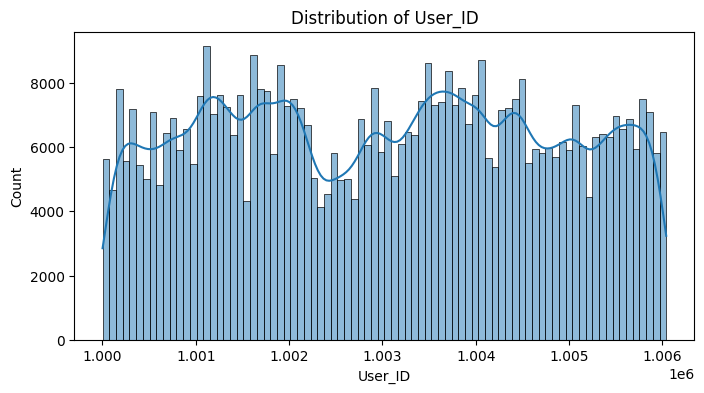

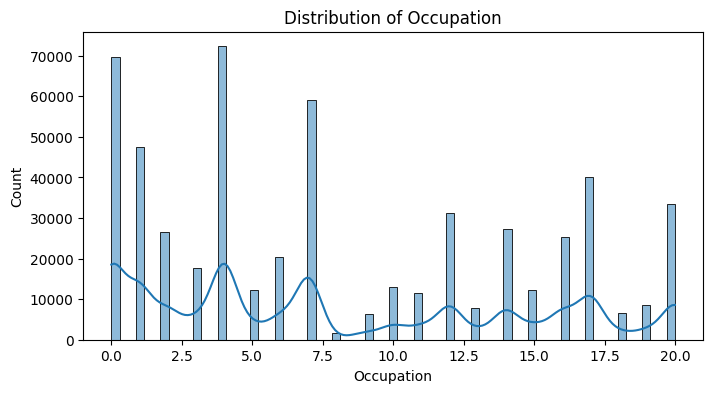

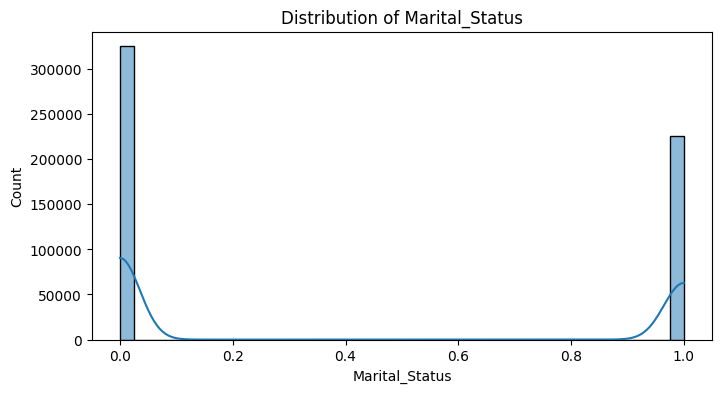

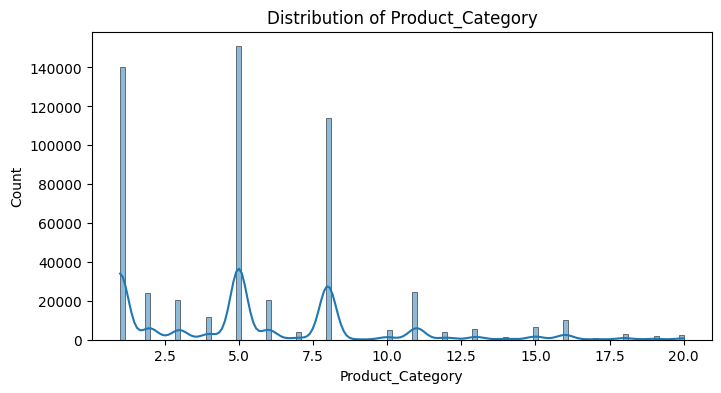

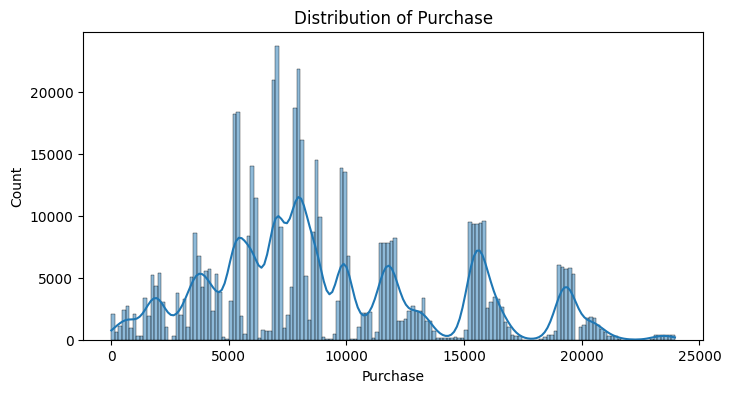

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("/content/sample_data/walmart_data.txt")

# Check if df exists
if 'df' in globals():
    numeric_cols = df.select_dtypes(include=['number']).columns

    if len(numeric_cols) == 0:
        print("No numeric columns found in the DataFrame.")
    else:
        for col in numeric_cols:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col].dropna(), kde=True)  # Drop NaN values if present
            plt.title(f"Distribution of {col}")
            plt.show()
else:
    print("Error: DataFrame 'df' is not defined.")


***Visual Analysis***


---


# Univariate Analysis

---


For Continuous Variables


---













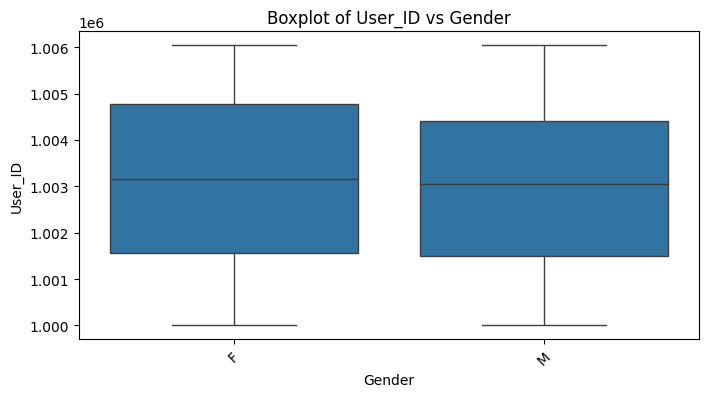

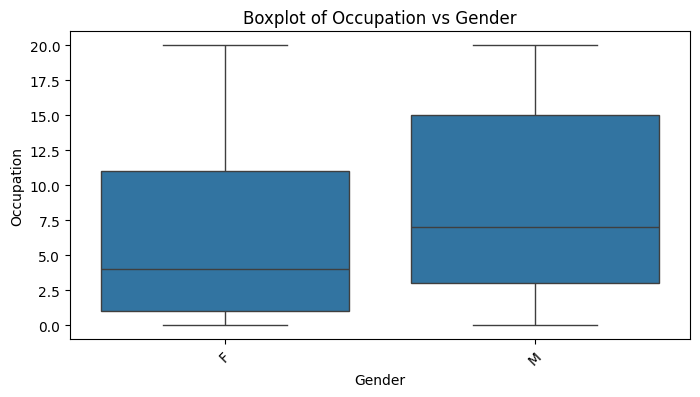

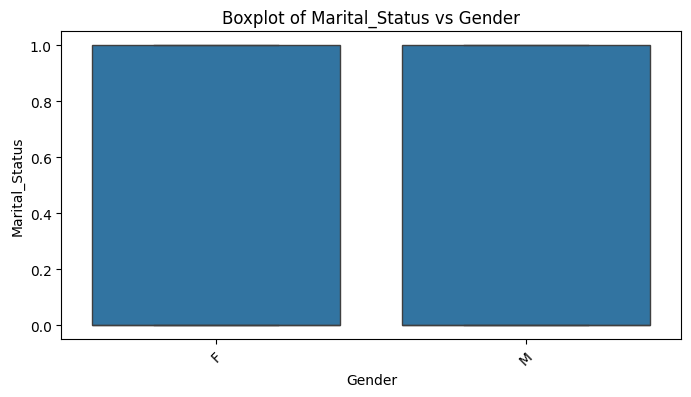

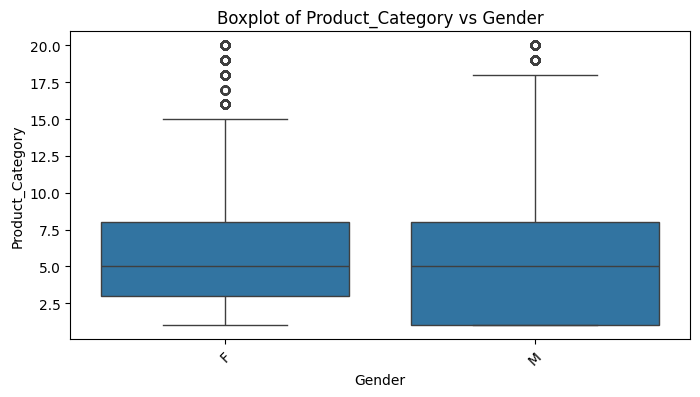

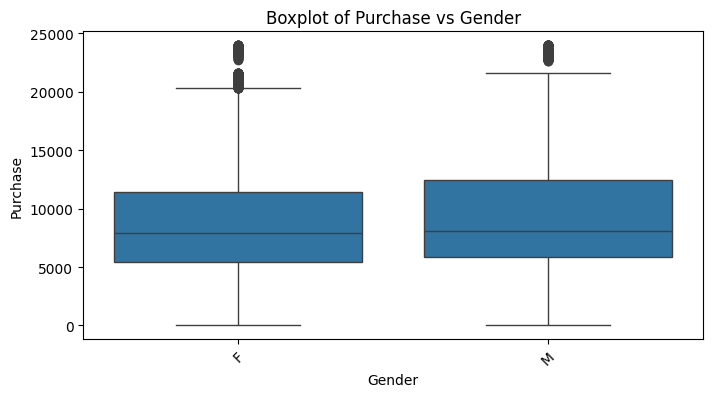

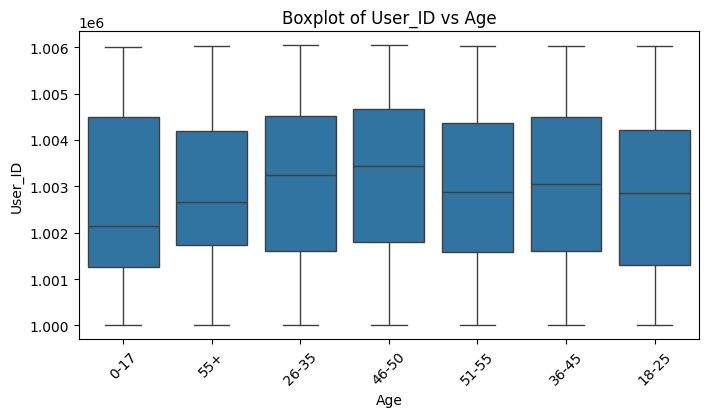

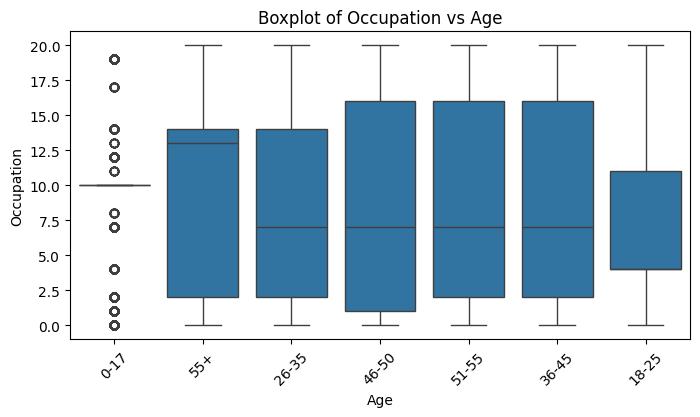

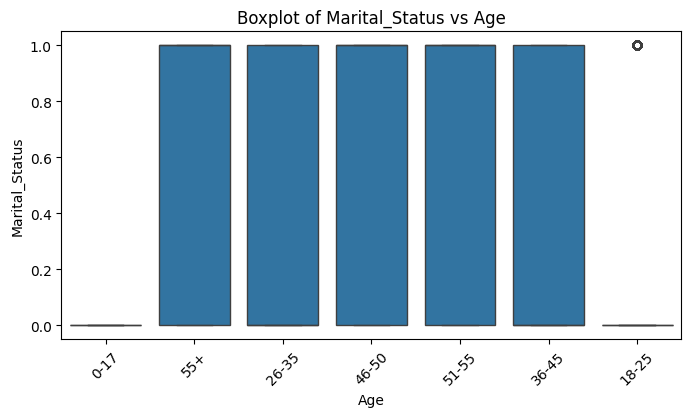

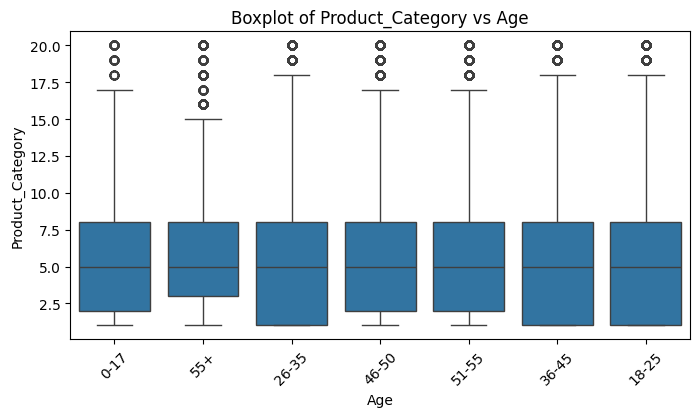

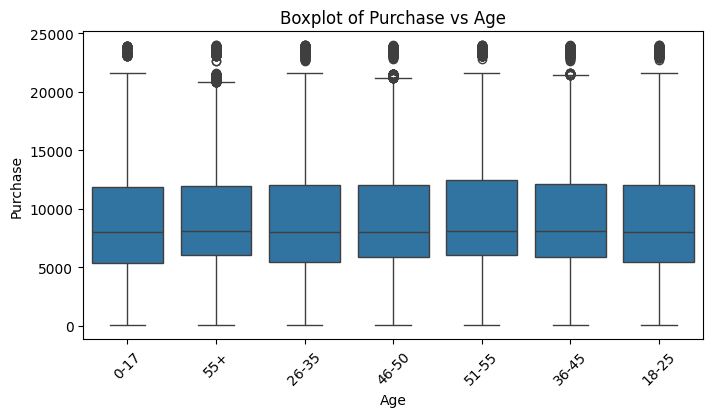

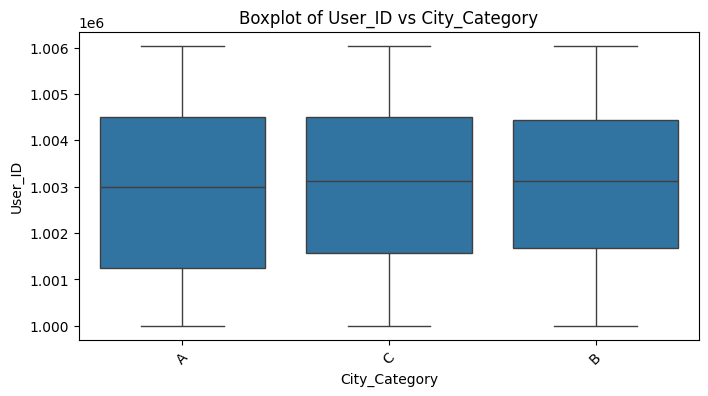

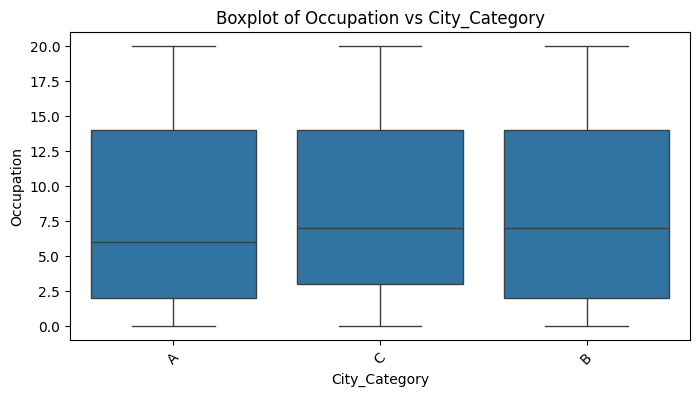

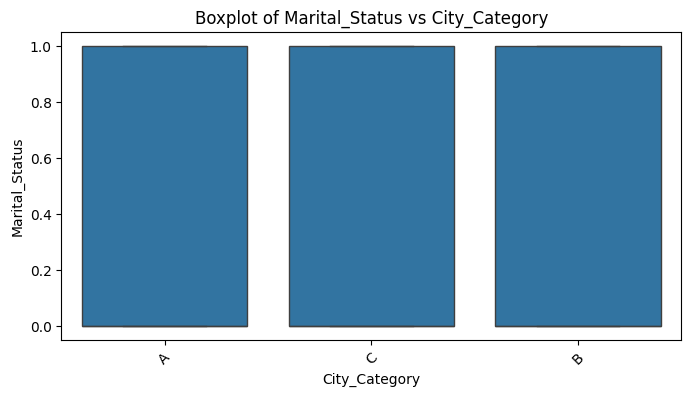

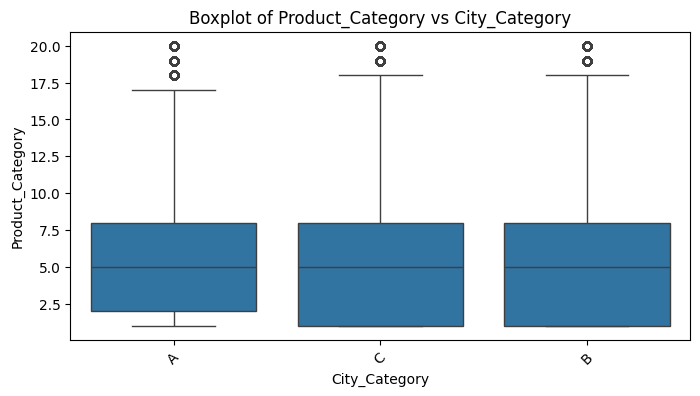

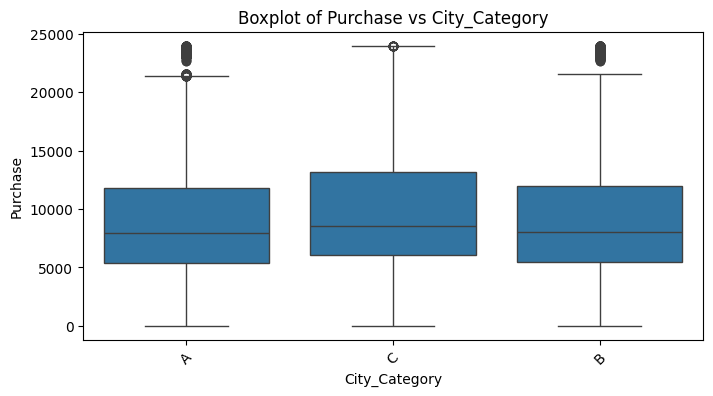

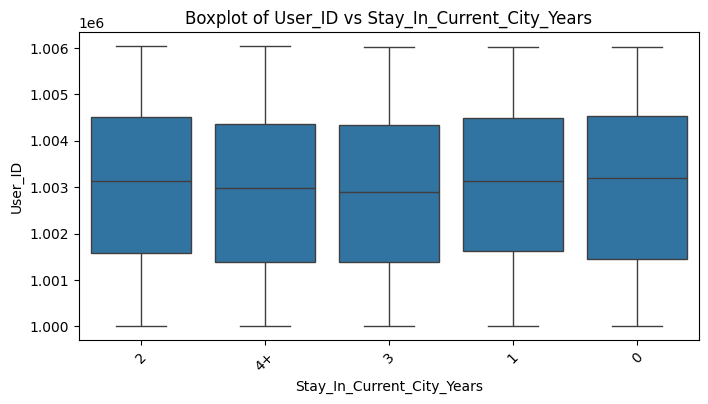

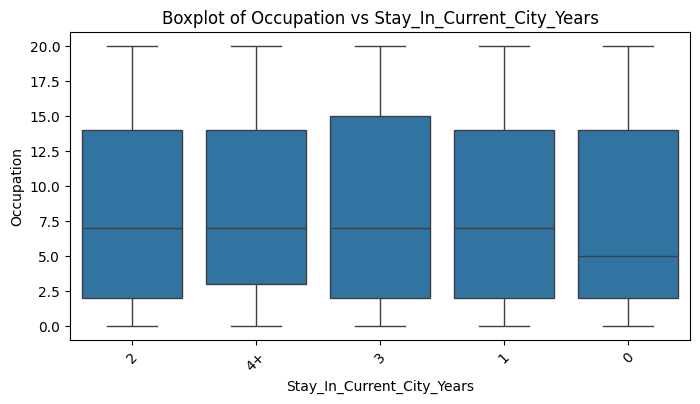

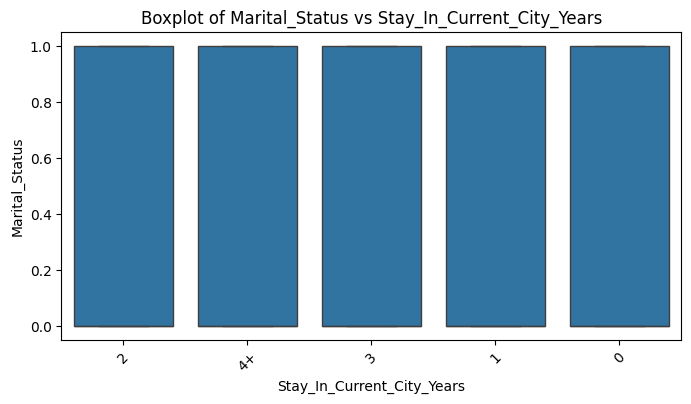

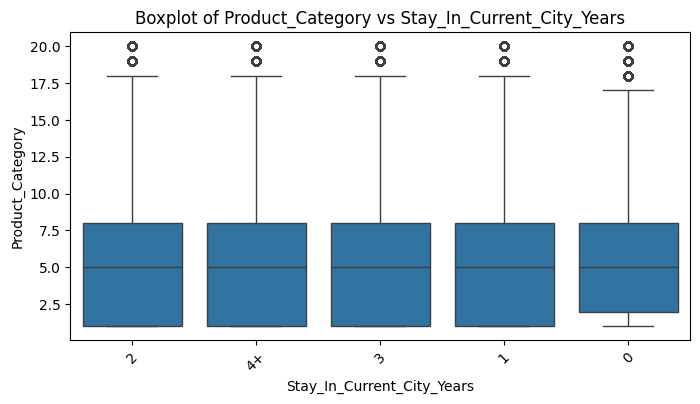

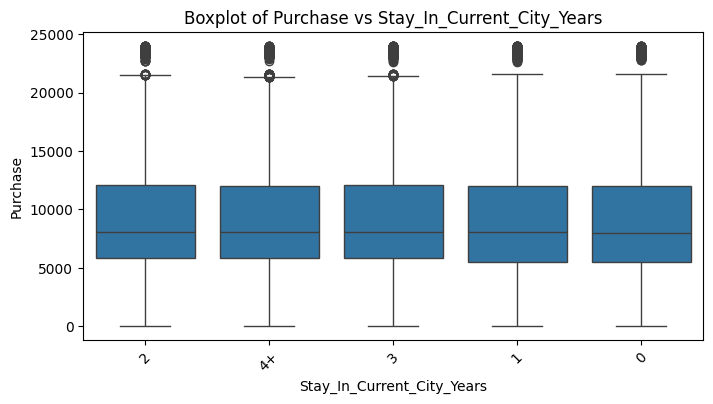

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("/content/sample_data/walmart_data.txt")


# Ensure categorical columns are defined
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    if df[col].nunique() > 20:  # Skip if too many categories
        continue
    for num_col in df.select_dtypes(include=['number']).columns:
        df_clean = df.dropna(subset=[col, num_col])  # Drop NaN values

        if df_clean.empty:  # Skip if no data left
            print(f"Skipping {col} vs {num_col} due to no data")
            continue

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df_clean[col], y=df_clean[num_col])
        plt.title(f"Boxplot of {num_col} vs {col}")
        plt.xticks(rotation=45)
        plt.show()

For Categorical Variables

---



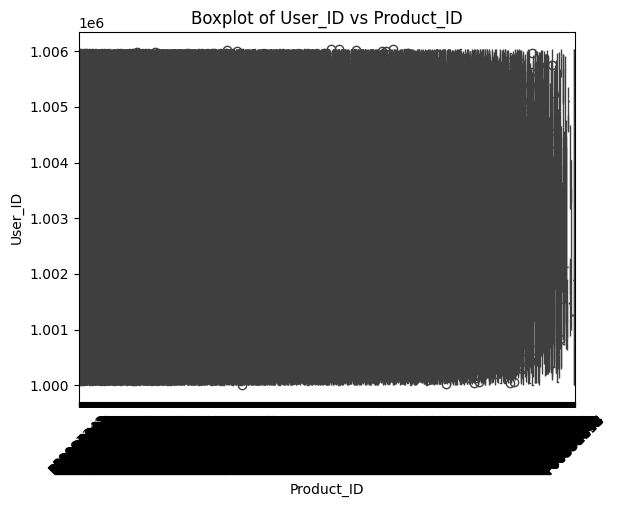

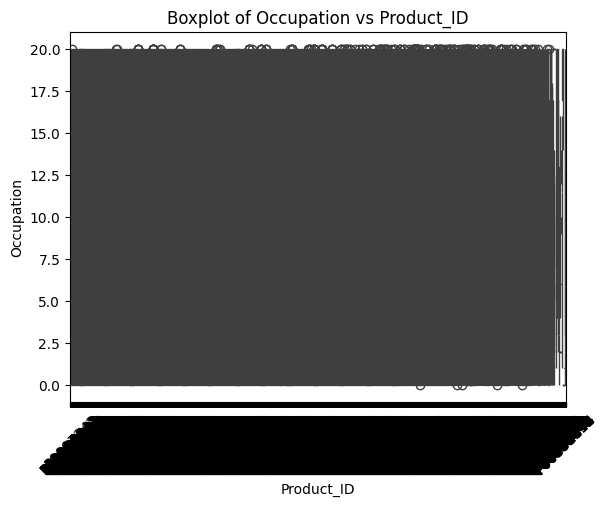

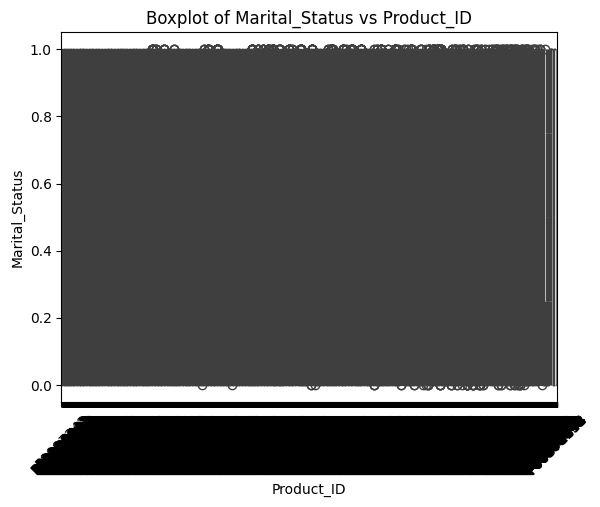

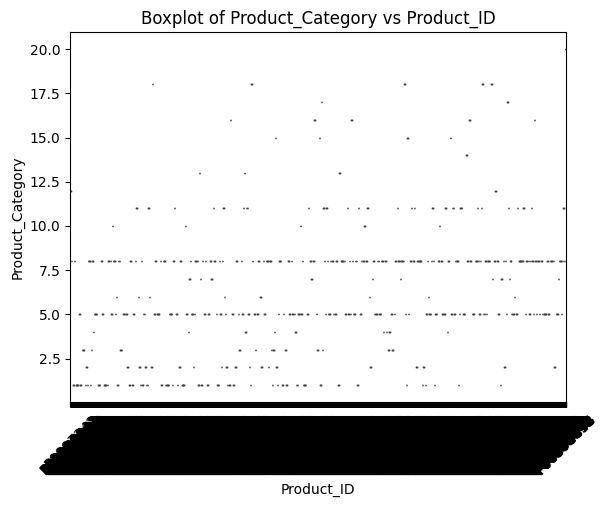

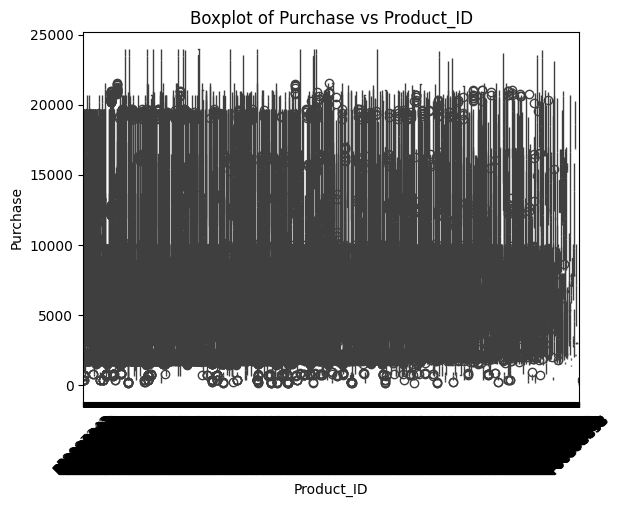

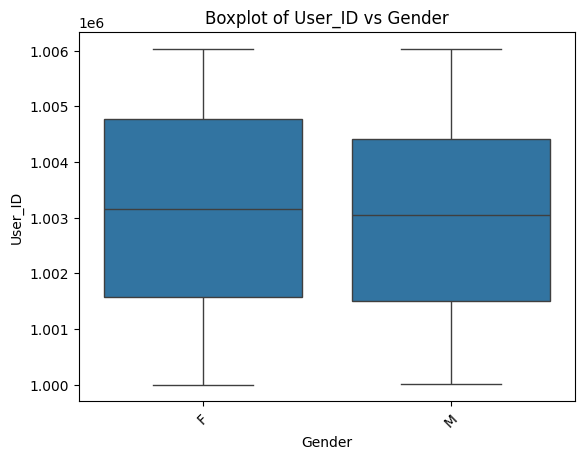

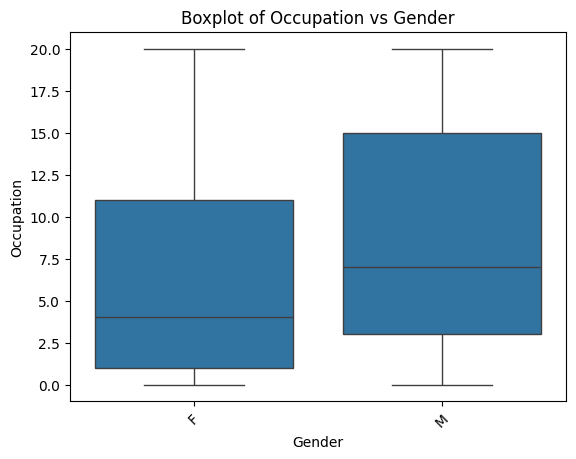

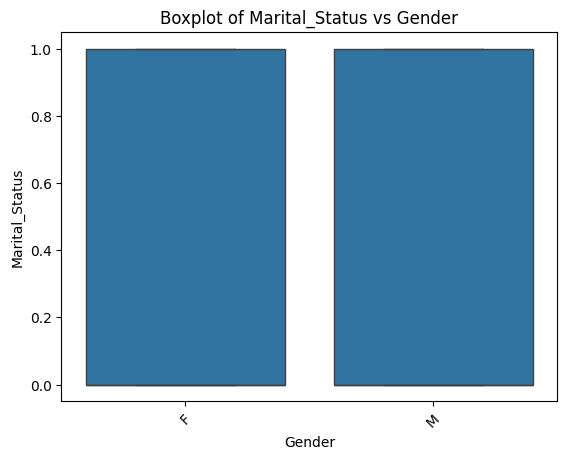

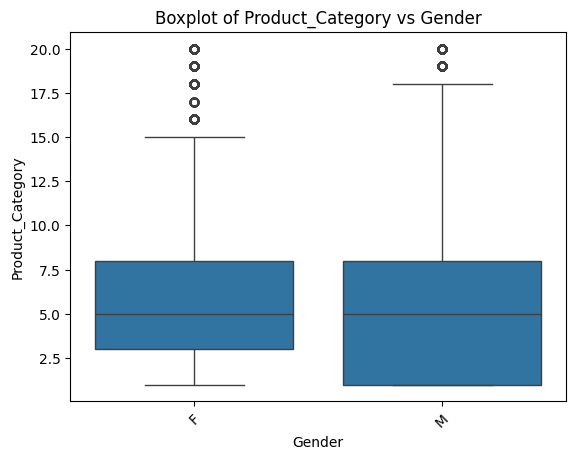

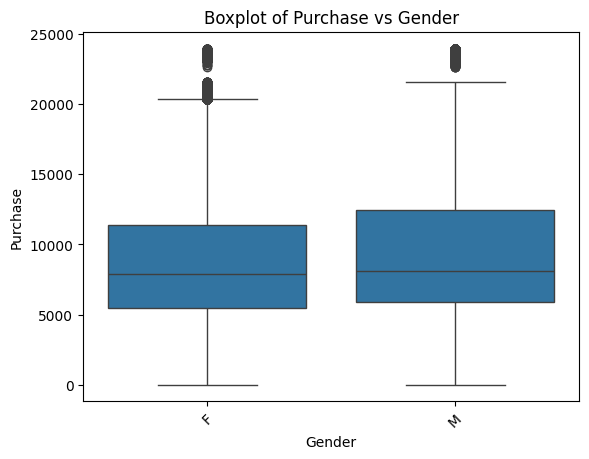

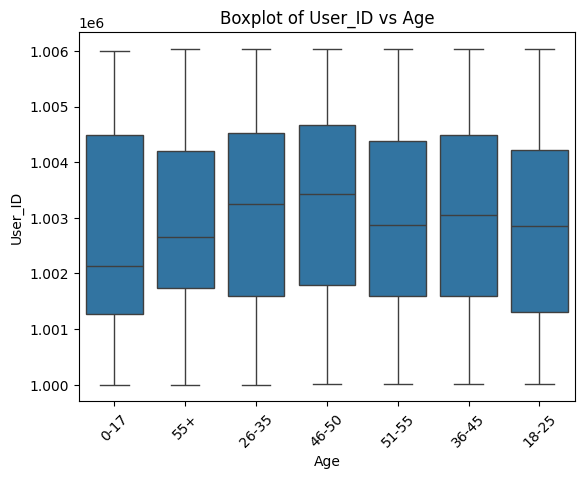

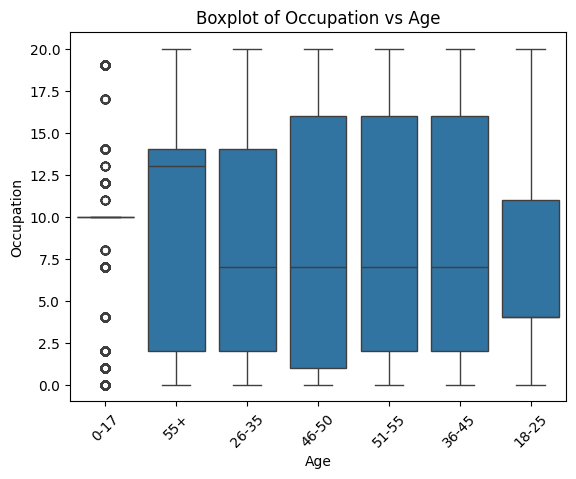

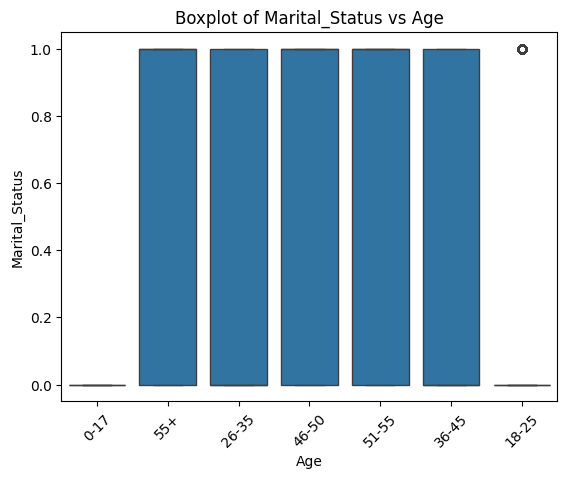

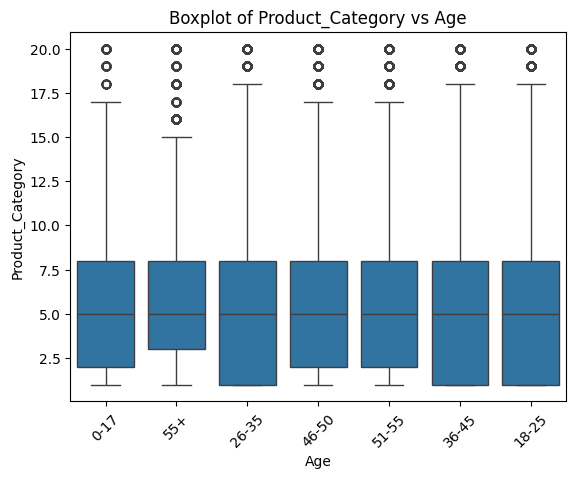

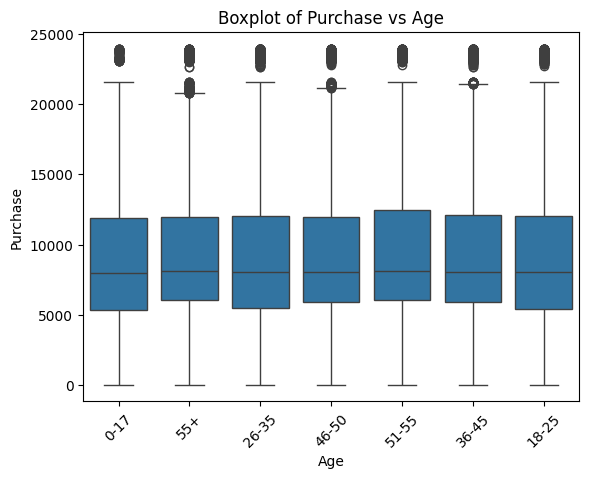

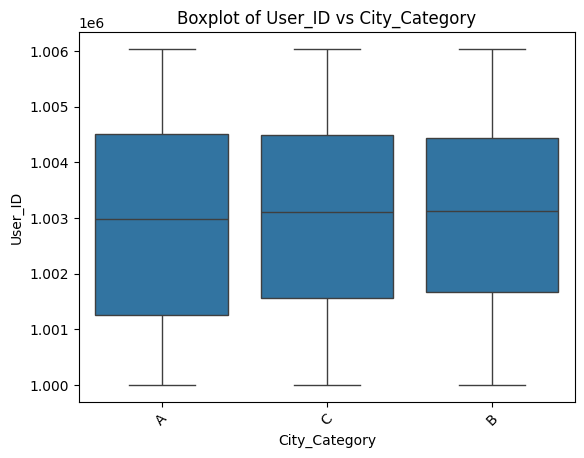

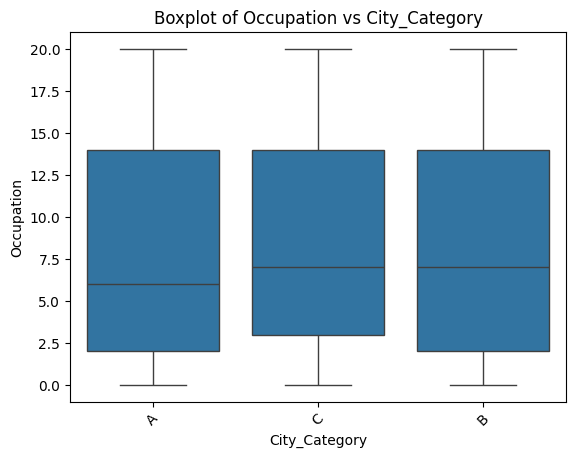

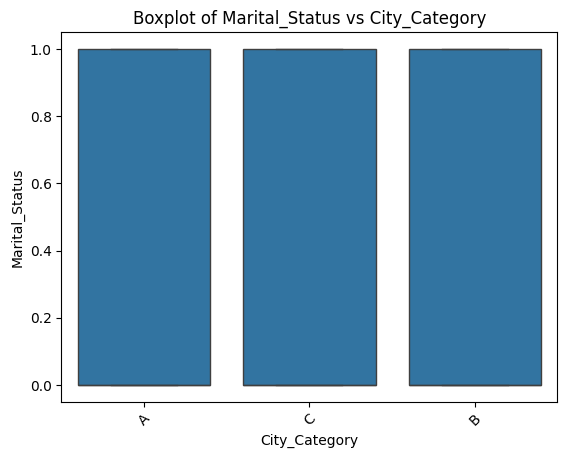

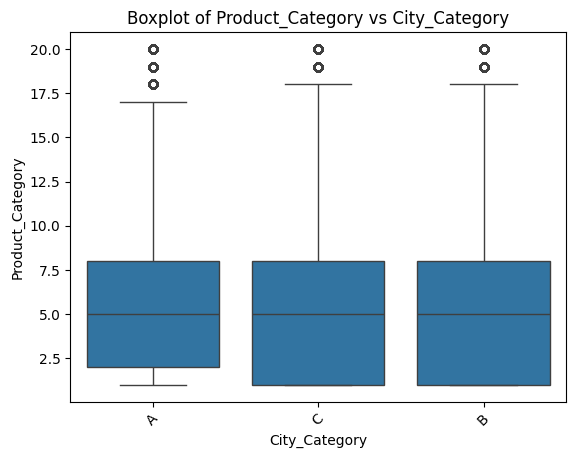

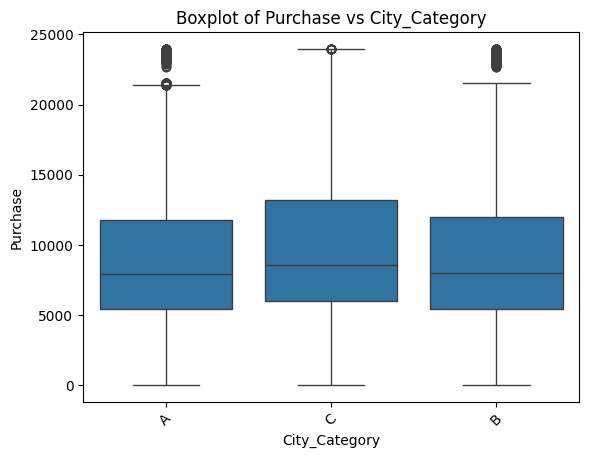

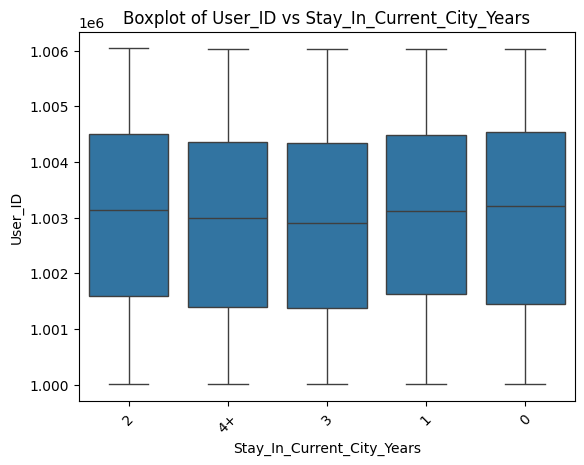

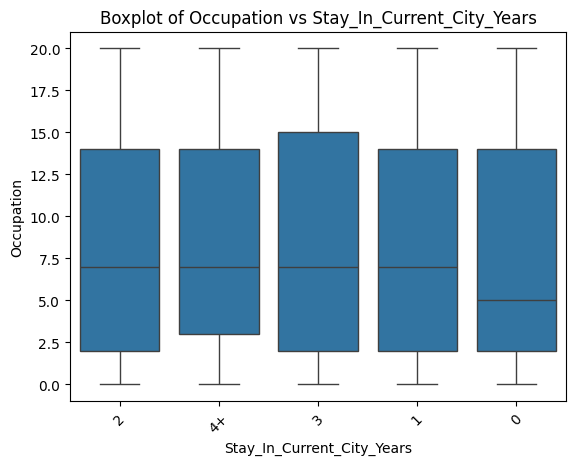

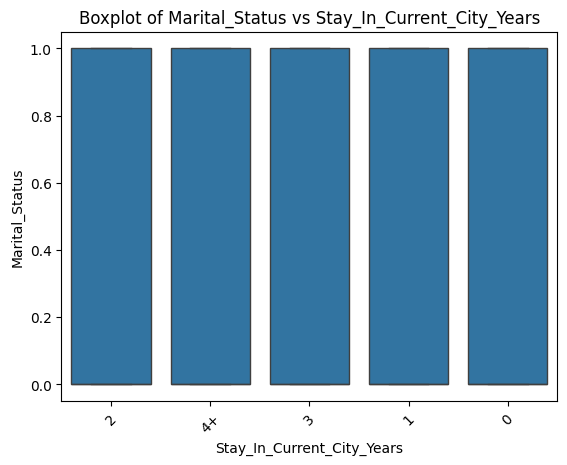

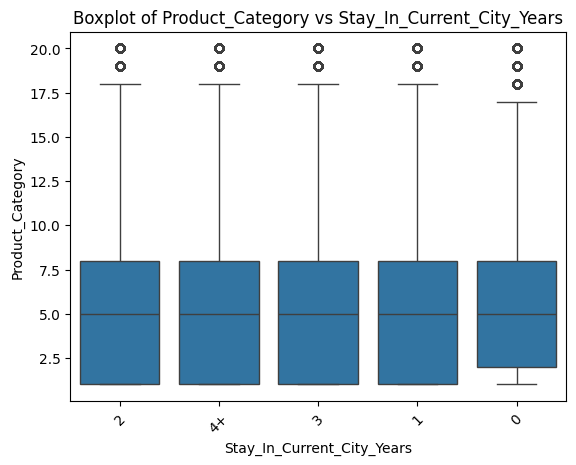

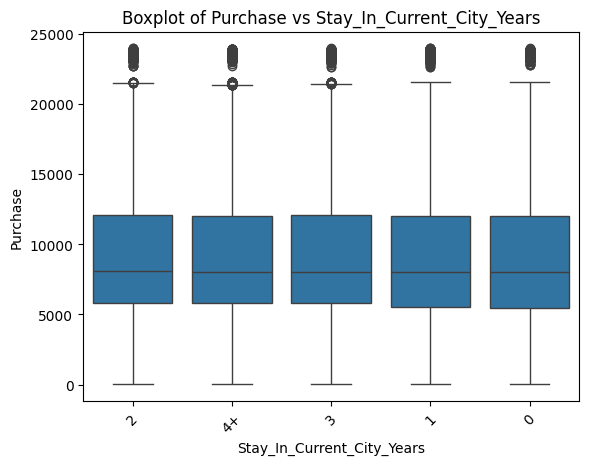

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("/content/sample_data/walmart_data.txt")
for col in categorical_cols:
    for num_col in df.select_dtypes(include=['number']).columns:
        sns.boxplot(x=df[col], y=df[num_col])
        plt.title(f"Boxplot of {num_col} vs {col}")
        plt.xticks(rotation=45)
        plt.show()


***Bivariate Analysis***

Boxplot for Categorical vs Continuous

---



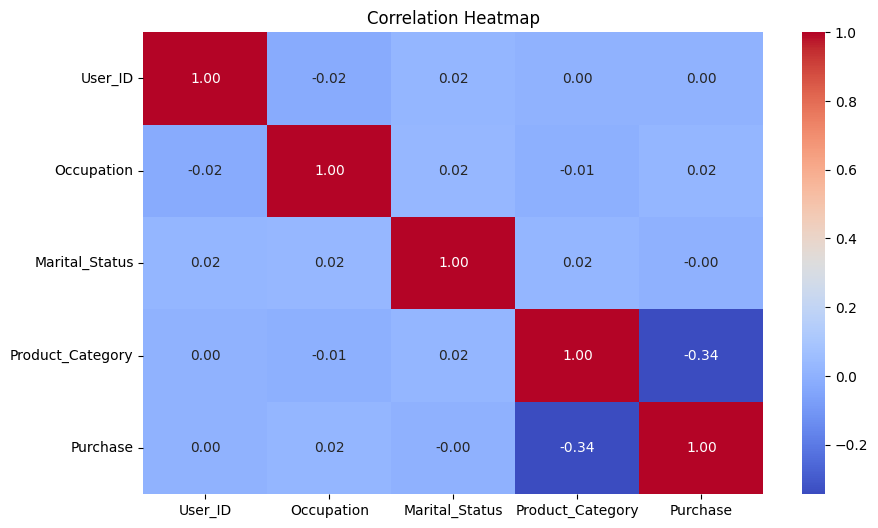

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("/content/sample_data/walmart_data.txt")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_df.corr()

# Check if correlation matrix is empty
if corr_matrix.empty:
    print("No numeric columns for correlation heatmap.")
else:
    plt.figure(figsize=(10, 6))  # Adjust figure size
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

***Heatmaps & Pairplots for Correlation***

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


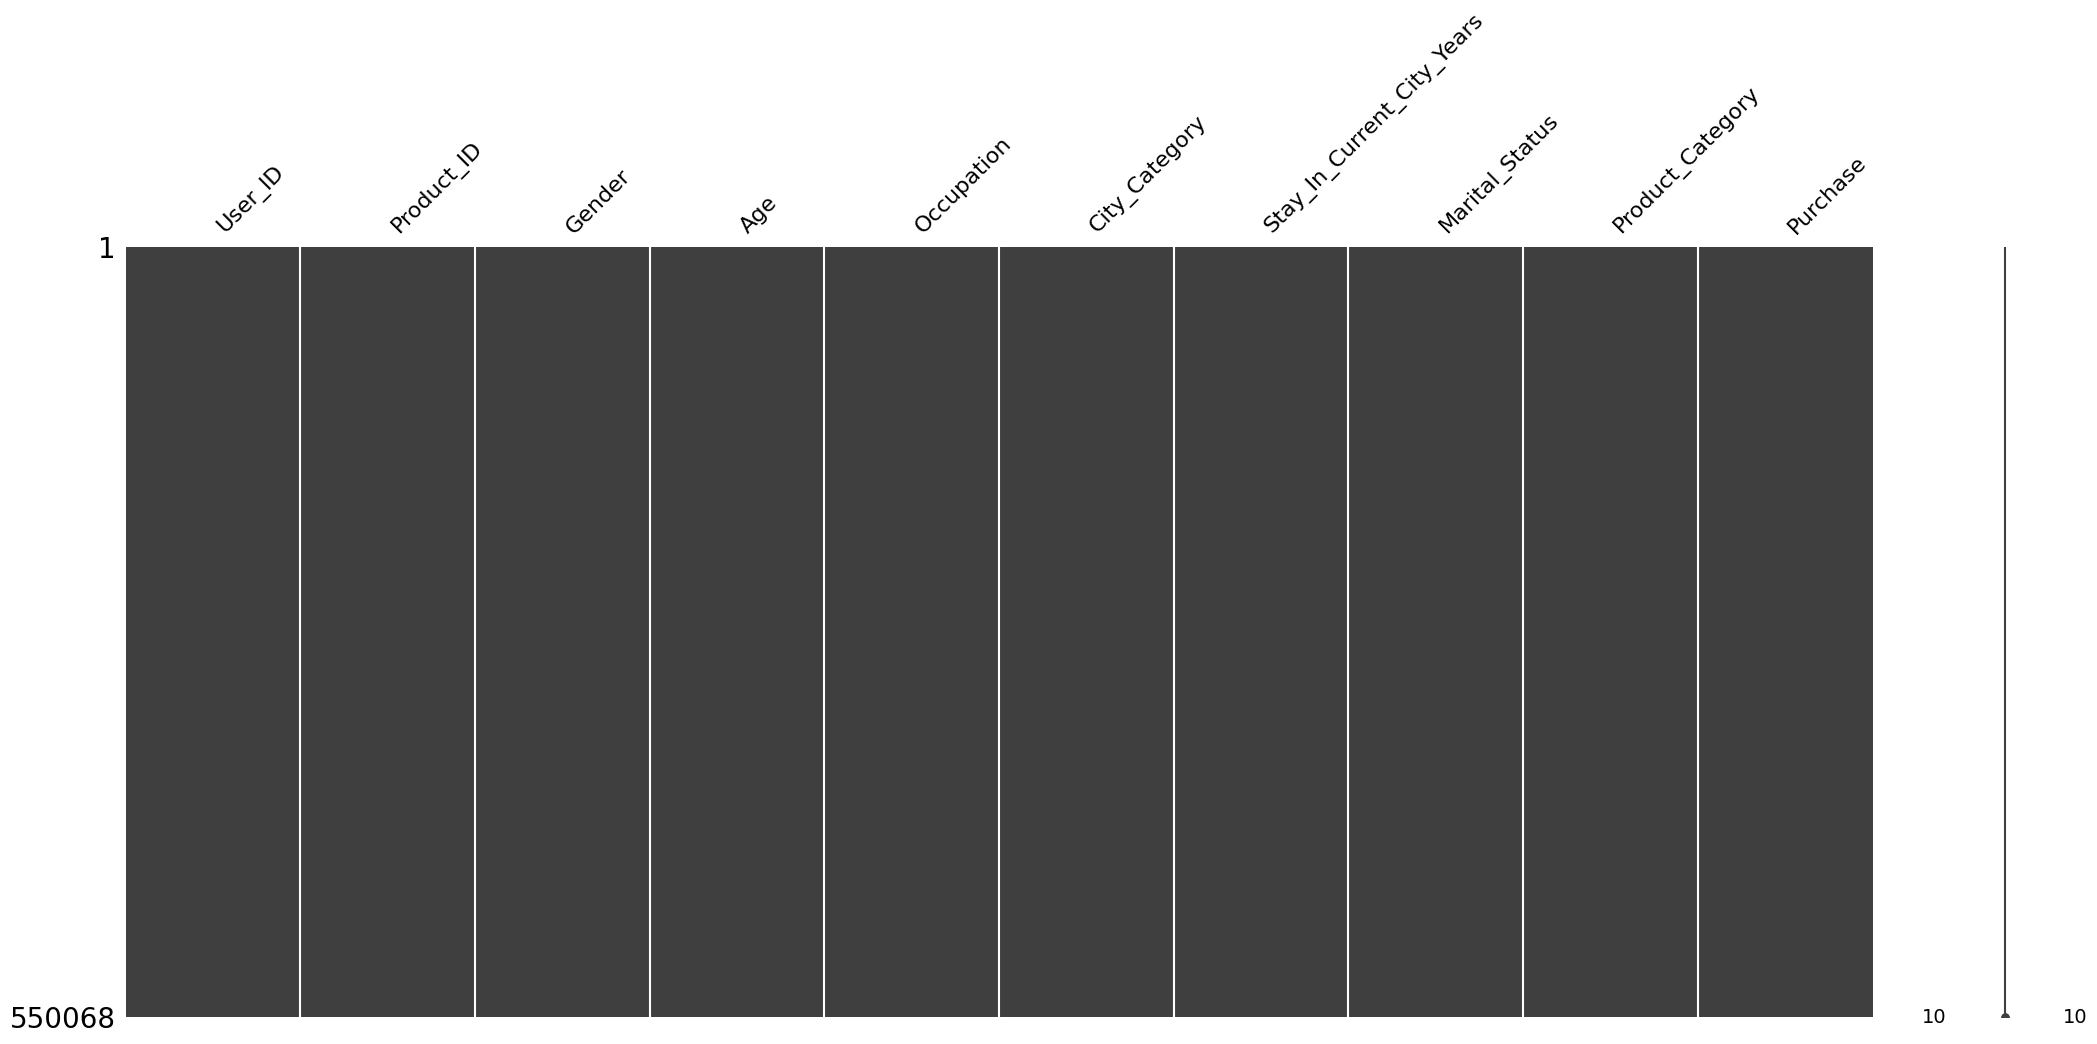

In [22]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values
import missingno as msno
msno.matrix(df)
plt.show()

*** Missing Value Detection***

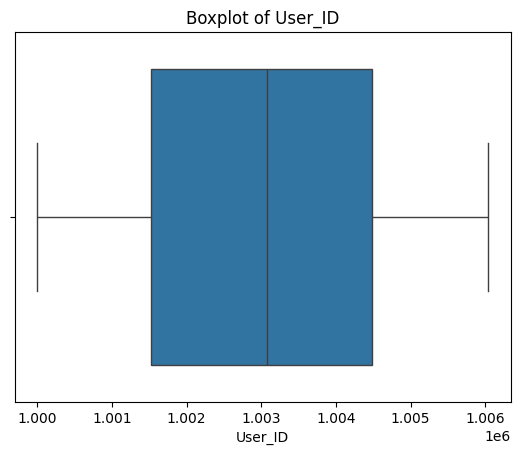

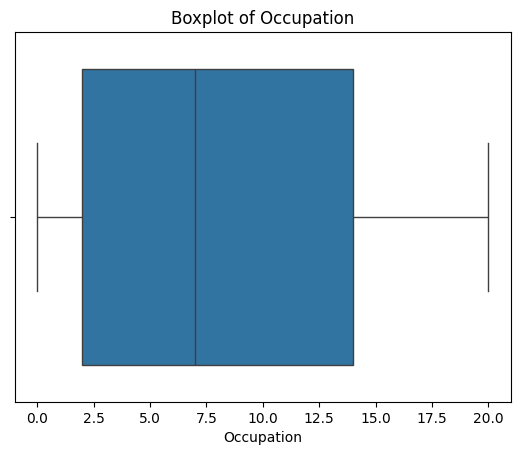

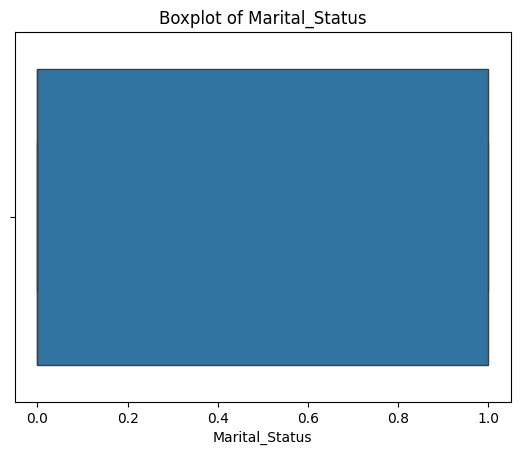

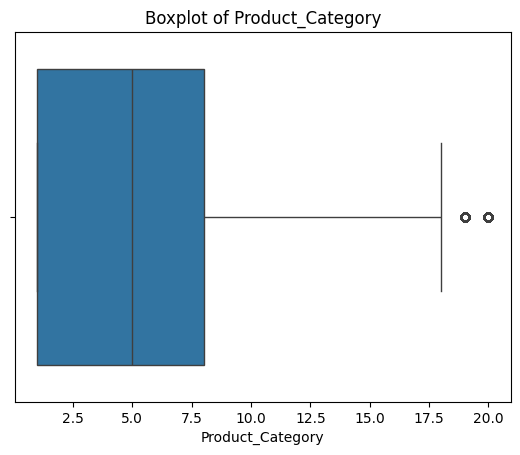

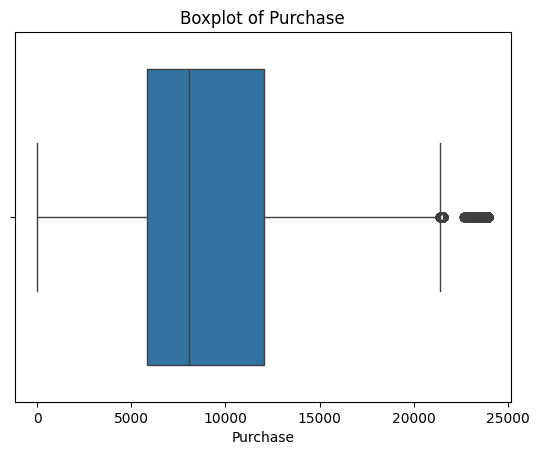

In [23]:
# Boxplot to detect outliers
for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

**Outlier Detection**

---



```
# This is formatted as code
```

